### Multiclass classification problem

# machine learning process
1. Objective
2. Data Loading - loading given train/test dataset
3. Data Pre-Processing - Feature Selection, categorical-mapping,train-test split
4. Data Exploration - seaborn,matplotlib
5. Model Training -  ['Random Forest','Decision Tree', 'SVC', 'LogisticRegression', 'KNeighborsClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier' ]
6. HyperParameter tuning - GridSearchCV[Parameter selection]
7. Model Evaluation - cohen_kappa_score,f1_score(micro),accuracy

#### dependency installation
    to perform sampling of dataset please install below library in Anaconda
    using anacoda
    conda install -c glemaitre imbalanced-learn
    using pip
    pip install -U imbalanced-learn   

 ### Objective - Evaluation of object based on given features [multiclass problem]

    Attributes[Independent variables]: 
    purchasing_cost: very_high, high, medium, low
    repair_cost: very_high, high, medium, low
    windows: 2, 3, 4, 5more
    people: 2, 4, more
    space: small, medium, big 
    safety: low, med, high
    
    Object Values[dependent variable]: 
    unacceptable,acceptable,good,very_good
    
    train.csv: 
    1383 records
    test.csv:
    347 records

#### Data Loading - loading train and test data using data_loading function

In [1]:
# Importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import cohen_kappa_score
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, log_loss
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

C:\Users\rahul.a.tripathi\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
location = 'C:\AI\case_study\multiclass_classification_2' # please change the base location to load dataset
def data_loading(location):
    train = pd.read_csv(location + '\\' + 'train.csv')    # loading train dataset
    test = pd.read_csv(location + '\\' + 'test.csv')      # loading test dataset
    return train,test                                     # returning train and test data

In [3]:
train,test = data_loading(location)                       # storing dataset as train and test dataset
train.head()                                              # print five records of train data

,purchasing_cost,repair_cost,windows,people,space,safety,label
0,high,very_high,5more,more,medium,med,unacceptable
1,very_high,medium,4,more,big,low,unacceptable
2,medium,medium,5more,4,medium,low,unacceptable
3,high,high,2,more,medium,high,acceptable
4,high,very_high,5more,2,big,high,unacceptable


#### Data pre-processing

__Analysis__ -
1. Given train/test dataset contain categorical variable I tried first LabelEncoding but label encoding is not good option here reason is
        I. LabelEncoding always perform encoding in alphabetical order which is not correct in our dataset as it is encoding  high as 0 which is not correct. It will not preserve the significance of all categorical values.
           
__Solution__ 

        I. For solving this issue we have to manually map the categorical values in key:value pair
        II.manually mapping is done by data_preprocessing() which will return encoded train/test data

In [4]:
# manually encoding train/test data as key:value pair
def data_preprocessing(location):
    train = pd.read_csv(location + '\\' + 'train.csv')                      # reading train.csv from base location
    # encoding all train categorical variable by mapping all values in key:value pair
    train['purchasing_cost'] = train['purchasing_cost'].map({'very_high' : 3,'high' : 2, 'medium' : 1, 'low' : 0})
    train['repair_cost'] = train['repair_cost'].map({'very_high' : 3,'high' : 2, 'medium' : 1, 'low' : 0})
    train['windows'] = train['windows'].map({'5more' : 5, '2' : 2,'3' : 3, '4' : 4})
    train['people'] = train['people'].map({'more' : 5, '2' : 2, '4' : 4})
    train['space'] = train['space'].map({'small' : 0,'medium' : 1, 'big' : 2})
    train['safety'] = train['safety'].map({'low' : 0,'med' : 1, 'high' : 2})
    train['label'] = train['label'].map({'unacceptable' : 0,'acceptable' : 1,'good' : 2,'very_good' : 3})
    
    test = pd.read_csv(location + '\\' + 'test.csv')                        # reading train.csv from base location
    # encoding all train categorical variable by mapping all values in key:value pair
    test['purchasing_cost'] = test['purchasing_cost'].map({'very_high' : 3,'high' : 2, 'medium' : 1, 'low' : 0})
    test['repair_cost'] = test['repair_cost'].map({'very_high' : 3,'high' : 2, 'medium' : 1, 'low' : 0})
    test['windows'] = test['windows'].map({'5more' : 5, '2' : 2,'3' : 3, '4' : 4})
    test['people'] = test['people'].map({'more' : 5, '2' : 2, '4' : 4})
    test['space'] = test['space'].map({'small' : 0,'medium' : 1, 'big' : 2})
    test['safety'] = test['safety'].map({'low' : 0,'medium' : 1, 'high' : 2})
            
    return train, test

In [5]:
train, test = data_preprocessing(location)   # saving encoded train and test data in train and test dataframe

In [6]:
# Splitting the trainset into the Training set and Test set in 70:30 ratio
def train_test_split(train,test):
    X = train.iloc[:,0:6]                                      # reading independent features using index
    y = train.iloc[:,6]                                        # reading target variable

    
    from sklearn.cross_validation import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)   # spliting in 70:30 ratio  
    return X_train, X_test, y_train, y_test                                                         # returning X_train, X_test, y_train, y_test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(train,test)  # saving train_test split function data in X_train, X_test, y_train, y_test 

 ### Data Exploration - using seaborn and matplotlib

In [8]:
# calling data_preprocssing function and printing top 5 records
train,test = data_preprocessing(location)
train.head()                           # printing five records of train data                      

,purchasing_cost,repair_cost,windows,people,space,safety,label
0,2,3,5,5,1,1,0
1,3,1,4,5,2,0,0
2,1,1,5,4,1,0,0
3,2,2,2,5,1,2,1
4,2,3,5,2,2,2,0


In [9]:
test.head()                           # printing five records of test data  

,purchasing_cost,repair_cost,windows,people,space,safety
0,0,1,2,2,1,2
1,2,2,4,2,2,2
2,0,3,5,2,0,0
3,2,3,5,5,1,0
4,1,0,4,4,0,0


#####  Visualization

label class encoding - {'unacceptable' : 0,'acceptable' : 1,'good' : 2,'very_good' : 3}

__ Analysis__
             1. By doing visualising we are checking whether there is any class imbalance problem or not.
             II. printing hist() of train label
             III. Cleary dataset is suffering from class imbalance problem where unacceptable(0) class is in majority
             IV. Checking which features impacting the label class using seaborn pairplot
             seaborn pairplot - Plot pairwise relationships in a dataset.
                     a. purchasing_cost impacting more 0 and 1 class
                     b. windows feature is impacting all classes
__Finding__
            1. Dataset is suffering from class imbalance problem

(array([974.,   0.,   0., 298.,   0.,   0.,  54.,   0.,   0.,  56.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

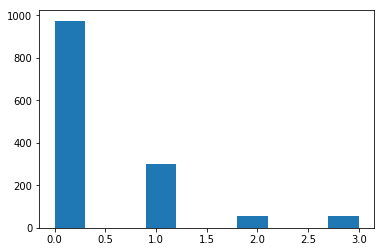

In [10]:
# matplotlib inline sets the backend of matplotlib to the 'inline' backend
%matplotlib inline   
# visualising label to see whether class is imbalance or not
plt.hist((train.label))

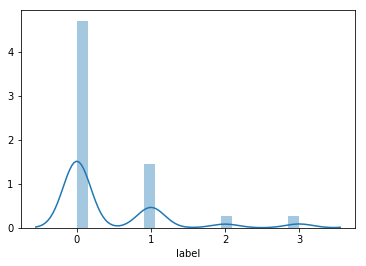

In [11]:
# using seaborn library
sns.distplot(train['label'], bins=20 )

In [12]:
# seeing how much % each class belong
train.pivot_table(index=['label'], values=['purchasing_cost'], aggfunc=len).div(len(train.index)).mul(100) 

,purchasing_cost
label,
0,70.477569
1,21.562952
2,3.907381
3,4.052098


In [13]:
# basic statistics info
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
purchasing_cost,1382.0,1.490593,1.126142,0.0,0.0,1.0,3.0,3.0
repair_cost,1382.0,1.495658,1.112588,0.0,1.0,2.0,2.0,3.0
windows,1382.0,3.522431,1.117566,2.0,3.0,4.0,5.0,5.0
people,1382.0,3.650507,1.242558,2.0,2.0,4.0,5.0,5.0
space,1382.0,1.005789,0.817953,0.0,0.0,1.0,2.0,2.0
safety,1382.0,0.992041,0.818377,0.0,0.0,1.0,2.0,2.0
label,1382.0,0.415340,0.751342,0.0,0.0,0.0,1.0,3.0


In [14]:
# mean - The mean performance of an experiment gives a good idea of how the experiment will turn out on average under a given treatment.
train[['purchasing_cost', 'repair_cost', 'windows', 'people', 'space','safety']].mean()  

purchasing_cost    1.490593
repair_cost        1.495658
windows            3.522431
people             3.650507
space              1.005789
safety             0.992041
dtype: float64

In [15]:
# variance - The variance in the performance provides a measurement of how consistent the results of an experiment are. The lower the variance, the more consistent the results are, and vice versa.
train[['purchasing_cost', 'repair_cost', 'windows', 'people', 'space','safety']].var()  

purchasing_cost    1.268195
repair_cost        1.237852
windows            1.248953
people             1.543950
space              0.669047
safety             0.669741
dtype: float64

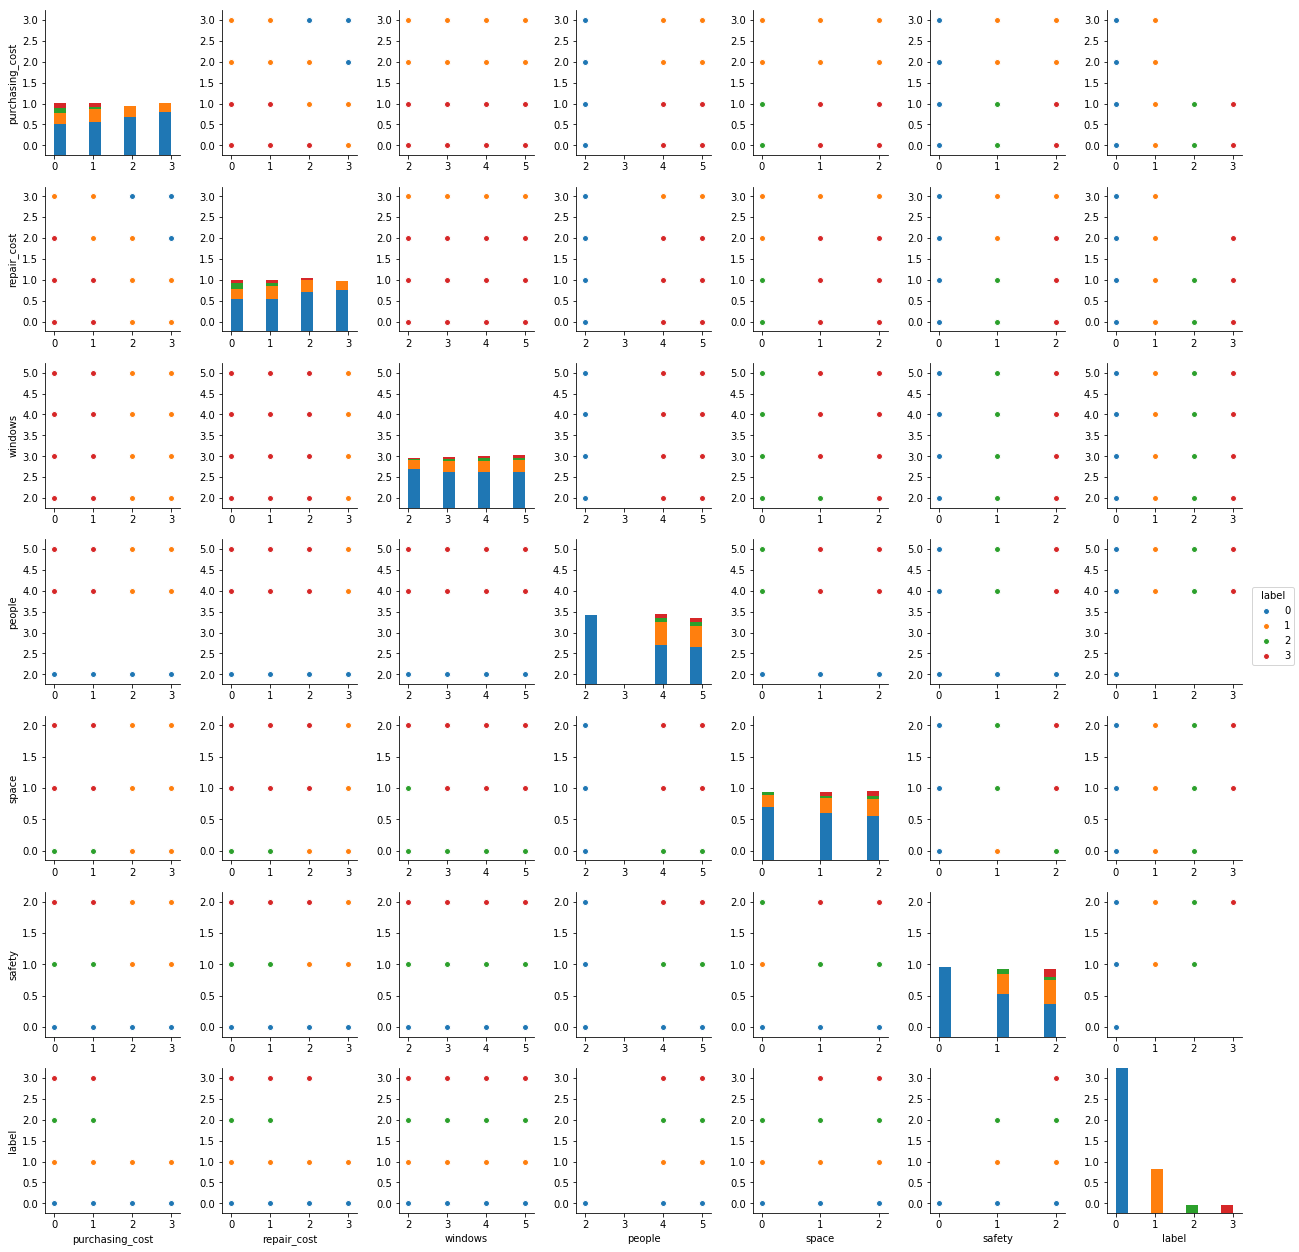

In [16]:
# pairplot using seaborn library
# pairplot help us to find correlation among all features
g = sns.pairplot(train, hue="label")

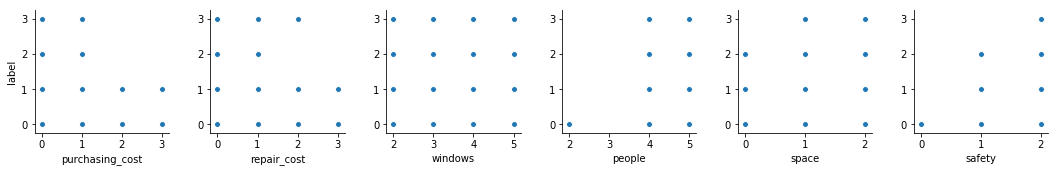

In [17]:
# pairplot by explicit mention target and subject variable
pp = sns.pairplot(data=train,
                  y_vars=['label'],
                  x_vars=['purchasing_cost', 'repair_cost', 'windows', 'people', 'space','safety'])

### Feature Engineering

###### Feature Selection

__Analysis__
            1. feature selection using SelectKBest and chi2
            
__Finding__
            1. Top 4 features selected based on Chi2 score are : ['purchasing_cost', 'repair_cost', 'people', 'safety']
        

In [18]:
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = train.iloc[:,0:6]
y = train.iloc[:,6]
# feature extraction
k_best = SelectKBest(score_func=chi2, k=4)
fit = k_best.fit(X, y)
# summarize scores
numpy.set_printoptions(precision=2)
print(fit.scores_)
features = fit.transform(X)

feature_names =  ['purchasing_cost', 'repair_cost', 'windows', 'people', 'space','safety']

mask = k_best.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features.append(feature)
        
print "Top 4 features selected based on Chi2 score are : " + str(new_features)

[111.08  78.27   3.06 109.9   27.74 212.98]
Top 4 features selected based on Chi2 score are : ['purchasing_cost', 'repair_cost', 'people', 'safety']


#### Sampling techniques

Solving the class Imbalance problem using imblearn library

1. Undersampling - NearMiss
2. Oversampling - RandomOverSampler
3. Hybridsampling - SMOTETomek

__Analysis__ -
    I've compared all 3 techniques on all models and find that doing Oversampling giving me good kappa score

In [19]:
'''
# undersampling
us = NearMiss(ratio=0.5, n_neighbors=3, version=2)
X_train_res, y_train_res = us.fit_sample(X_train, y_train)

print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_res)))
'''

'\n# undersampling\nus = NearMiss(ratio=0.5, n_neighbors=3, version=2)\nX_train_res, y_train_res = us.fit_sample(X_train, y_train)\n\nprint ("Distribution of class labels before resampling {}".format(Counter(y_train)))\nprint ("Distribution of class labels after resampling {}".format(Counter(y_train_res)))\n'

In [20]:
# oversampling
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler(ratio=0.5)
X_train_res, y_train_res = os.fit_sample(X_train, y_train)

print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_res)))

Distribution of class labels before resampling Counter({0: 667, 1: 218, 3: 44, 2: 38})
Distribution of class labels after resampling Counter({0: 667, 1: 333, 2: 333, 3: 333})


C:\Users\rahul.a.tripathi\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [21]:
'''
# Hybridsampling
from imblearn.combine import SMOTETomek
os_us = SMOTETomek(ratio=0.5, k=5)
X_train_res, y_train_res = os_us.fit_sample(X_train, y_train)

print ("Distribution of class labels before resampling {}".format(Counter(y_train)))
print ("Distribution of class labels after resampling {}".format(Counter(y_train_res)))
'''


'\n# Hybridsampling\nfrom imblearn.combine import SMOTETomek\nos_us = SMOTETomek(ratio=0.5, k=5)\nX_train_res, y_train_res = os_us.fit_sample(X_train, y_train)\n\nprint ("Distribution of class labels before resampling {}".format(Counter(y_train)))\nprint ("Distribution of class labels after resampling {}".format(Counter(y_train_res)))\n'

### Model Training

Comparing multiple models on given train dataset

For setting the Optimal Hyperparameter value i've run the gridsearchCV on base model to get correct hyperparameter values

In [22]:
#Random Forest Classifier
def random_forest(X_train_res, X_test, y_train_res):
    #rf_clf = RandomForestClassifier()                                                     # instance of random forest 
    rf_clf = RandomForestClassifier(criterion = 'gini', max_depth = 9, n_estimators = 100) # tuned random forest
    rf_clf = rf_clf.fit(X_train_res,y_train_res)                                           # fitting sampled train dataset on rf
    rf_predict = rf_clf.predict(X_test)                                                    # predicting on test dataset
    rf_acc = accuracy_score(y_test,rf_predict)                                             # rf accuracy score
    rf_kappa = cohen_kappa_score(y_test,rf_predict)                                        # rf cohen kappa score
    accuracy = cross_val_score(rf_clf, X_train_res , y_train_res, cv=10,scoring = 'accuracy') # rf cross_val_score using 10-fold cv
    f_score = cross_val_score(rf_clf, X_train_res , y_train_res, cv=10,scoring = 'f1_micro') # rf f1-score
    rf_accuracy, rf_f_score = accuracy.mean(),f_score.mean()                                # taking acc and f1 mean score of all 10fold
    #print "accuracy and f_score are:  "
    return rf_accuracy, rf_f_score,rf_clf,rf_kappa                                          # returning rf_accuracy, rf_f_score,rf_clf,rf_kappa

In [23]:
# printing random_forest kappa score
rf_accuracy, rf_f_score, rf_clf,rf_kappa = random_forest(X_train_res, X_test, y_train_res)
rf_kappa

0.8714235680801767

In [24]:
#Decision Tree
def decision_tree(X_train_res, X_test, y_train_res):
    dt_clf = tree.DecisionTreeClassifier()                                                     # instance of decison tree classifier               
    dt_clf.set_params(max_leaf_nodes = 50,max_depth = 10, max_features = None)                 # tuned decison tree
    dt_clf = dt_clf.fit(X_train_res,y_train_res)                                               # fitting sampled train dataset on dt                                         
    dt_predict = dt_clf.predict(X_test)                                                        # predicting on test dataset
    dt_acc = accuracy_score(y_test,dt_predict)                                                 # dt accuracy score
    dt_kappa = cohen_kappa_score(y_test,dt_predict)                                            # dt cohen kappa score
    accuracy = cross_val_score(dt_clf, X_train_res , y_train_res, cv=10,scoring = 'accuracy')  # dt cross_val_score using 10-fold cv
    f_score = cross_val_score(dt_clf, X_train_res , y_train_res, cv=10,scoring = 'f1_micro')   # dt f1-score
    dt_accuracy, dt_f_score = accuracy.mean(),f_score.mean()                                   # taking acc and f1 mean score of all 10fold
    #print "accuracy and f_score are:  "
    return dt_accuracy, dt_f_score,dt_clf,dt_kappa                                             # returning dt_accuracy, dt_f_score,dt_clf,dt_kappa

In [25]:
# printing decision tree kappa score
dt_accuracy, dt_f_score, dt_clf,dt_kappa = decision_tree(X_train_res, X_test, y_train_res)
dt_kappa

0.8972122079423177

In [26]:
#Support Vector Machines
def svc(X_train_res, X_test, y_train_res):
    clf = svm.SVC()                                                                         # creating instance of svc
    clf.set_params(C= 10, gamma= 0.1, kernel= 'rbf')                                        # tuned svc
    #clf.set_params(C = 100, kernel = "rbf")
    svm_clf = clf.fit(X_train_res,y_train_res)                                              # fitting model on sampled train data
    svm_predict = svm_clf.predict(X_test)                                                   # predict on test data
    svm_acc = accuracy_score(y_test,svm_predict)                                            # accuracy score
    svm_kappa = cohen_kappa_score(y_test,svm_predict)                                       # cohen kappa score of svc
    accuracy = cross_val_score(clf, X_train_res , y_train_res, cv=10,scoring = 'accuracy')  # 10-fold accuracy score
    f_score = cross_val_score(clf, X_train_res , y_train_res, cv=10,scoring = 'f1_micro')   # 10-fold f1-score
    svc_accuracy, svc_f_score = accuracy.mean(),f_score.mean()                              # f1 and accuracy mean score
    #print "accuracy and f_score are:  "
    return svc_accuracy, svc_f_score,svm_clf,svm_kappa                                      # return svc_accuracy, svc_f_score,svm_clf,svm_kappa


In [27]:
# printing svc kappa score
svc_accuracy, svc_f_score, svm_clf,svm_kappa = svc(X_train_res, X_test, y_train_res)
svm_kappa

0.9155382486228325

In [28]:
# k-NN 
def k_NN(X_train_res, X_test, y_train_res):
    clf = KNeighborsClassifier()                                                            # instance of knn classifier
    clf.set_params(n_neighbors= 2)                                                          # tuned knn
    #clf.set_params(n_neighbors= 5,leaf_size = 30)          
    knn_clf = clf.fit(X_train_res,y_train_res)                                              # fitting model on sampled train data
    knn_predict = knn_clf.predict(X_test)                                                   # predict on test data
    knn_acc = accuracy_score(y_test,knn_predict)                                            # accuracy score
    knn_kappa = cohen_kappa_score(y_test,knn_predict)                                       # cohen kappa score of knn
                                                   
    accuracy = cross_val_score(clf, X_train_res , y_train_res, cv=10,scoring = 'accuracy')  # 10-fold accuracy score
    f_score = cross_val_score(clf, X_train_res , y_train_res, cv=10,scoring = 'f1_micro')   # 10-fold f1-score
    knn_accuracy, knn_f_score = accuracy.mean(),f_score.mean()                              # f1 and accuracy mean score
    #print "accuracy and f_score are:  "
    return knn_accuracy, knn_f_score,knn_clf,knn_kappa                                      # return knn_accuracy, knn_f_score,knn_clf,knn_kappa


In [29]:
# printing knn kappa score
knn_accuracy, knn_f_score, knn_clf,knn_kappa = k_NN(X_train_res, X_test, y_train_res)
knn_kappa

0.6706486780000835

In [30]:
#AdaBoost
def ada_boost_classifier(X_train_res, X_test, y_train_res):
    clf = AdaBoostClassifier(base_estimator = dt_clf)                                                      # instance of adaboost classifier
    clf.set_params(base_estimator__criterion = 'gini',base_estimator__splitter= 'best',n_estimators = 100) # tuned adaboost
    #clf.set_params(dt_clf,learning_rate = 1)
    #clf.set_params(n_estimators = 10, learning_rate = 1)
    ada_clf = clf.fit(X_train_res,y_train_res)                                                             # fitting model on sampled train data
    ada_predict = ada_clf.predict(X_test)                                                                  # predict on test data
    ada_acc = accuracy_score(y_test,ada_predict)                                                           # accuracy score
    ada_kappa = cohen_kappa_score(y_test,ada_predict)                                                      # cohen kappa score of cohen_kappa
    accuracy = cross_val_score(clf, X_train_res , y_train_res, cv=10,scoring = 'accuracy')                 # 10-fold accuracy score
    f_score = cross_val_score(clf, X_train_res , y_train_res, cv=10,scoring = 'f1_micro')                  # 10-fold f1-score
    ada_accuracy, ada_f_score = accuracy.mean(),f_score.mean()                                             # f1 and accuracy mean score
    #print "accuracy and f_score are:  "
    return ada_accuracy, ada_f_score,ada_clf,ada_kappa                                                     # return ada_accuracy, ada_f_score,ada_clf,ada_kappa 

In [31]:
# printing adaboost kappa score
ada_accuracy, ada_f_score,ada_clf,ada_kappa = ada_boost_classifier(X_train_res, X_test, y_train_res)
ada_kappa

0.9480737949922841

In [32]:
#GradientBoostingClassifier
def gradient_boosting_classifier(X_train_res, X_test, y_train_res):
    clf = GradientBoostingClassifier()                                                     # instance of adaboost classifier
    clf.set_params(learning_rate= 1, max_depth= 3, n_estimators = 30, min_samples_split=3) # tuned gradient boosting
    #clf.set_params(n_estimators = 30,learning_rate = 1)
    gb_clf = clf.fit(X_train_res,y_train_res)                                              # fitting model on sampled train data
    gb_predict = gb_clf.predict(X_test)                                                    # predict on test data
    gb_acc = accuracy_score(y_test,gb_predict)                                             # accuracy score
    gb_kappa = cohen_kappa_score(y_test,gb_predict)                                        # cohen kappa score of cohen_kappa
    accuracy = cross_val_score(clf, X_train_res , y_train_res, cv=10,scoring = 'accuracy') # 10-fold accuracy score
    f_score = cross_val_score(clf, X_train_res , y_train_res, cv=10,scoring = 'f1_micro')  # 10-fold f1-score
    gb_accuracy, gb_f_score = accuracy.mean(),f_score.mean()                               # f1 and accuracy mean score
    #print "accuracy and f_score are:  "
    return gb_accuracy, gb_f_score,gb_clf,gb_predict,gb_kappa                              # return gb_accuracy, gb_f_score,gb_clf,gb_predict,gb_kappa

In [33]:
# printing gradient boosting kappa score
gb_accuracy, gb_f_score,gb_clf,gb_predict, gb_kappa = gradient_boosting_classifier(X_train_res, X_test, y_train_res)
gb_kappa

0.9825091317785895

In [34]:
# storing all return values from all models
rf_accuracy, rf_f_score, rf_clf,rf_kappa = random_forest(X_train_res, X_test, y_train_res)
dt_accuracy, dt_f_score, dt_clf,dt_kappa = decision_tree(X_train_res, X_test, y_train_res)
svc_accuracy, svc_f_score, svm_clf,svm_kappa = svc(X_train_res, X_test, y_train_res)
knn_accuracy, knn_f_score, knn_clf,knn_kappa = k_NN(X_train_res, X_test, y_train_res)
ada_accuracy, ada_f_score,ada_clf,ada_kappa = ada_boost_classifier(X_train_res, X_test, y_train_res)
gb_accuracy, gb_f_score,gb_clf,gb_predict, gb_kappa = gradient_boosting_classifier(X_train_res, X_test, y_train_res)

###### GridsearchCV  [Hyperparameter Tuning]

Running GridsearchCV to find best hyperparameter values

In [35]:
def ada_param_selection(ada_clf):
    param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [5, 10, 15, 20, 100]
             }
    grid_clf = GridSearchCV(ada_clf, param_grid, cv=10)
    grid_clf.fit(X_train, y_train)
    best_param = grid_clf. best_params_
    return best_param

# best_param = ada_param_selection(ada_clf)
# best_param

In [36]:
def rf_param_selection(rf_clf):
    param_grid = {
                 'n_estimators': [5, 10, 15, 20, 100],
                 'max_depth': [2, 5, 7, 9],
                 "criterion": ["gini", "entropy"]
             }
    grid_clf = GridSearchCV(rf_clf, param_grid, cv=10)
    grid_clf.fit(X_train, y_train)
    best_param = grid_clf. best_params_
    return best_param

# best_param = rf_param_selection(rf_clf)
# best_param

In [37]:
def svc_param_selection(svm_clf):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': ['linear','rbf']}
    grid_clf = GridSearchCV(svm_clf, param_grid, cv=10)
    grid_clf.fit(X_train, y_train)
    best_param = grid_clf. best_params_
    return best_param
# best_param = svc_param_selection(svm_clf)
# best_param

In [38]:
def gb_param_selection(gb_clf):
    param_grid = [ {'n_estimators': [20,30,50], 'learning_rate':[0.01,0.1,1], 'max_depth': [2,3,4], 'min_samples_split': [3]}, ]
    grid_clf = GridSearchCV(gb_clf, param_grid, cv=10)
    grid_clf.fit(X_train_res, y_train_res)
    best_param = grid_clf. best_params_
    return best_param
#best_param = gb_param_selection(gb_clf)
# best_param

In [39]:
def knn_param_selection(knn_clf):
    k_range = list(range(1, 31))
    param_grid = dict(n_neighbors=k_range)
    grid_clf = GridSearchCV(knn_clf, param_grid, cv=10, scoring='accuracy')
    grid_clf.fit(X_train_res, y_train_res)
    best_param = grid_clf. best_params_
    return best_param
#best_param = knn_param_selection(knn_clf)
#best_param

#### Features Importance based on Random forest

Feature ranking:
1. feature 5 (0.319412)
2. feature 0 (0.191241)
3. feature 3 (0.183764)
4. feature 1 (0.151775)
5. feature 4 (0.114732)
6. feature 2 (0.039077)


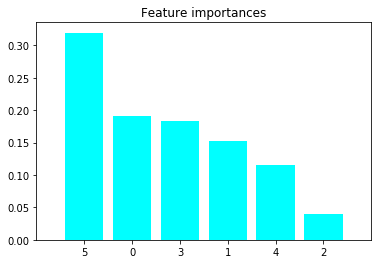

In [40]:

# selecting important features in the dataset
importances = rf_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(2)
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="cyan", align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

#### Evaluation

In [41]:
def accuracy_report():
    accuracy_report = {'Models': ['Random Forest','Decision Tree', 'SVC', 'KNeighborsClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier' ],
                  'model_accuracy': [rf_accuracy,dt_accuracy,svc_accuracy,knn_accuracy,ada_accuracy,gb_accuracy], 'cohen_kappa_score': [rf_kappa,dt_kappa,svm_kappa,knn_kappa,ada_kappa,gb_kappa], 'f1_score(micro)': [rf_f_score,dt_f_score,svc_f_score,knn_f_score,ada_f_score,gb_f_score] }
    accuracy_report = pd.DataFrame(accuracy_report)
    accuracy_report = accuracy_report.sort_values(by=['cohen_kappa_score'], ascending=False)
    return accuracy_report

In [42]:
accuracy_report()

,Models,cohen_kappa_score,f1_score(micro),model_accuracy
5,GradientBoostingClassifier,0.982509,0.995220,0.995220
4,AdaBoostClassifier,0.953697,0.994004,0.994607
2,SVC,0.915538,0.984975,0.984975
1,Decision Tree,0.897212,0.985000,0.984397
0,Random Forest,0.866770,0.984397,0.982604
3,KNeighborsClassifier,0.670649,0.933369,0.933369


##### Gradient boosting classification report

In [43]:
# Gradient boosting classification report
from sklearn.metrics import classification_report
gb_accuracy, gb_f_score,gb_clf,gb_predict,gb_kappa = gradient_boosting_classifier(X_train, X_test, y_train)
print (classification_report(y_test,gb_predict))

             precision    recall  f1-score   support

          0       1.00      0.99      1.00       307
          1       0.96      0.97      0.97        80
          2       0.87      0.81      0.84        16
          3       0.86      1.00      0.92        12

avg / total       0.98      0.98      0.98       415



In [44]:
# micro/macro averged precision 
from sklearn.metrics import precision_score
print('Micro-averaged precision = {:.2f} (treat instances equally)'
      .format(precision_score(y_test,gb_predict, average = 'micro')))
print('Macro-averaged precision = {:.2f} (treat classes equally)'
      .format(precision_score(y_test,gb_predict, average = 'macro')))

Micro-averaged precision = 0.98 (treat instances equally)
Macro-averaged precision = 0.92 (treat classes equally)


In [45]:
#micro/macro averged f1-score
from sklearn.metrics import f1_score
print('Micro-averaged f1 = {:.2f} (treat instances equally)'
      .format(f1_score(y_test,gb_predict, average = 'micro')))
print('Macro-averaged f1 = {:.2f} (treat classes equally)'
      .format(f1_score(y_test,gb_predict, average = 'macro')))

Micro-averaged f1 = 0.98 (treat instances equally)
Macro-averaged f1 = 0.93 (treat classes equally)


In [46]:
# cohen_kappa_score of gradient boosting
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,gb_predict)

0.9594850910713788

#### saving submission.csv using best model [Gradient boosting]

In [47]:
# saving the submission.csv in base location
def submission():
    result = test.copy(deep=True)                        # creating deep copy of test data so that it should not impact existing test data
    label = gb_clf.predict(test)                         # predicting label data using gradient boosting classifier
    result['label'] = label                              # creating new column name 'label' to store predicted label of test data
    result = result.iloc[:,[6]]                          # fetching label column
    # logic to reverse the dataframe
    result['id'] = result.index                          # storing index of row in 'id' column
    cols = result.columns.tolist()                       # storing dataframe columns in list
    cols = cols[-1:] + cols[:-1]                         # reversing the dataframe column
    result = result[cols]                                # storing reverse column in result dataframe
    result.to_csv(location +  '\\' + 'submission.csv', index = False) # saving submission.csv

In [48]:
submission()  # saving submission.csv

# Helping methods

In [ ]:
# Label Encode columns
'''
le = preprocessing.LabelEncoder();
le.fit(df['capital city'])

le.classes_

train["capital city integers"] = le.transform(train["capital city"])
test["capital city integers"] = le.transform(test["capital city"])
'''

In [1]:
# Label Encoding in one shot
'''
le = preprocessing.LabelEncoder()
train_df = train_df.apply(le.fit_transform)
test_df = test_df.apply(le.fit_transform)

'''

'\nle = preprocessing.LabelEncoder()\ntrain_df = train_df.apply(le.fit_transform)\ntest_df = test_df.apply(le.fit_transform)\n'

In [2]:
# Making the Confusion Matrix
'''
from sklearn.metrics import confusion_matrix
rf = confusion_matrix(y_test, y_pred)
print "Confusion Matrix"
print rf
'''

'\nfrom sklearn.metrics import confusion_matrix\nrf = confusion_matrix(y_test, y_pred)\nprint "Confusion Matrix"\nprint rf\n'

In [3]:
'''
# Displaying ROC Curve
#ROC Curve
plt.figure(1)
lw = 2
plt.plot(fpr_rf, tpr_rf, color='darkorange',
         lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_rf)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic(ROC_curve)')
plt.legend(loc="lower right")
'''

'\n# Displaying ROC Curve\n#ROC Curve\nplt.figure(1)\nlw = 2\nplt.plot(fpr_rf, tpr_rf, color=\'darkorange\',\n         lw=lw, label=\'Random Forest(AUC = %0.2f)\' % roc_auc_rf)\n\nplt.plot([0, 1], [0, 1], color=\'navy\', lw=lw, linestyle=\'--\')\n\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.05])\nplt.xlabel(\'False Positive Rate\')\nplt.ylabel(\'True Positive Rate\')\nplt.title(\'Receiver Operating Characteristic(ROC_curve)\')\nplt.legend(loc="lower right")\n'

In [4]:
# Deal with NAN values
'''
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer.fit(features) 
features = imputer.transform(features)
'''

"\nfrom sklearn.preprocessing import Imputer\nimputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)\nimputer.fit(features) \nfeatures = imputer.transform(features)\n"

In [5]:
# Feature scaling with StandardScaler
'''
from sklearn.preprocessing import StandardScaler
scale_features_std = StandardScaler()
features_train = scale_features_std.fit_transform(features_train)
features_test = scale_features_std.transform(features_test)

# Feature scaling with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scale_features_mm = MinMaxScaler()
features_train = scale_features_mm.fit_transform(features_train)
features_test = scale_features_mm.transform(features_test)
'''

'\nfrom sklearn.preprocessing import StandardScaler\nscale_features_std = StandardScaler()\nfeatures_train = scale_features_std.fit_transform(features_train)\nfeatures_test = scale_features_std.transform(features_test)\n\n# Feature scaling with MinMaxScaler\nfrom sklearn.preprocessing import MinMaxScaler\nscale_features_mm = MinMaxScaler()\nfeatures_train = scale_features_mm.fit_transform(features_train)\nfeatures_test = scale_features_mm.transform(features_test)\n'

In [6]:
# Dimensionality reduction
'''
from sklearn.decomposition import PCA
from sklearn.svm import SVC

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

X_pca.shape

SVC().fit(X_pca, y).score(X_pca, y)
'''

'\nfrom sklearn.decomposition import PCA\nfrom sklearn.svm import SVC\n\npca = PCA(n_components=2)\n\nX_pca = pca.fit_transform(X)\n\nX_pca.shape\n\nSVC().fit(X_pca, y).score(X_pca, y)\n'